# Publish Me: Release Assistant
The purpose of this project is to take published books sales data, then to sort it by sub-genre to allow self-publish authors to determine the highest probability for successful sales of their novel based on genre and sub-genre. The long term goal would be to design a web based dashboard that will allow the author search or filter for their sub-genre for sales numbers and to cross check with planned release dates of similar books that will be published by traditional publishing houses to prevent lower sales by releasing self-published books at or around the same time of more well known or popular authors.

### Dataset locations: 
Books_Data_Clean.csv (https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)

book_details.csv (https://www.kaggle.com/datasets/evilspirit05/comprehensive-goodreads-book-dataset?resource=download)   

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from collections import Counter
#import nltk
# nltk.download('stopwords')
import string
import sqlite3
from matplotlib.ticker import FuncFormatter
import seaborn as sn


### Data Collection and Loading: 

#### Load Data: I used Pandas to load the datasets via a CSV file. 

#### Initial Check: Please see below for the initial disply of the dataset. Then the first few rows and basic information about the dataset, noting column names, types, and missing values.

#### Selection Options:

⁜ From 'Books_Data_Clean', I dropped columns that were not needed for the analysis (index, language_code, Author_Rating, Book_average_rating, Book_ratings_count).

⁜ The columns that I focused in 'Books_Data_Clean' were Book_Name, Author, genre, gross_sales, publisher_revenue, sale_price, sales_rank, Pulisher_ and units_sold.  

⁜ From 'Book_Details, I changed column names, dropped rows with Nan values, separated the genres column into additional columns which would need to be sorted and prioritized for the genre/sub-genres/tropes, dropped un-needed columns. 

⁜ Prior to joining the data sets, I changed strings to upper and replaced special characters with ' ' to facilitate easier joining of the datasets. 

⁜ I used an inner join to combine the datasets 'Books_Data_Clean' with 'book_details' by book Title. Any books listed in the combined dataset with null values in author were dropped with the inner join to make the dataset more concise with the sales data. 

⁜ In order to differentiate genre into sub-genre, I wrote functions to find specific text values in the rows to make a Master_Genre column (Fiction or NonFiction). Then used a similar function to search a list for Fiction and NonFiction Genres (ex. Romance, Sci-Fi, Biography, etc.) for a Masster_Sub_Genre column. After making each new column I scrubed the rows for those values and replaced them with nan to avoid "counting" the values again.

⁜ I also wrote script to make a list of the remaining sub-genres/trope and sorted the list by value counts. I used this list to assess each row for the reamining sub-genres/tropes based on values to build additional columns in order of trope values, again scrubbing the rows for the matching value to prevent recounting. Then dropped the columns with nan values. 

In [408]:
BS = pd.read_csv("Books_Data_Clean.csv")

BS

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [409]:
BS.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [410]:
BS = BS.drop(['index','language_code','Author_Rating','Book_average_rating','Book_ratings_count'], axis=1)
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Publishing Year    1069 non-null   float64
 1   Book Name          1047 non-null   object 
 2   Author             1070 non-null   object 
 3   genre              1070 non-null   object 
 4   gross sales        1070 non-null   float64
 5   publisher revenue  1070 non-null   float64
 6   sale price         1070 non-null   float64
 7   sales rank         1070 non-null   int64  
 8   Publisher          1070 non-null   object 
 9   units sold         1070 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 83.7+ KB


In [411]:
# Replace spaces with underscores in column names
BS.columns = BS.columns.str.replace(' ', '_')
BS.head()

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [412]:
# change string to upper single column
#BS['Book Name'] = BS['Book Name'].str.upper() 

# change string to upper for multiple columns
BS = BS.assign(Book_Name=BS['Book_Name'].str.upper(), 
               Author=BS['Author'].str.upper(),
               genre=BS['genre'].str.upper(),
               Publisher_=BS['Publisher_'].str.upper())
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,"UNKNOWN, SEAMUS HEANEY",GENRE FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN: YEAR ONE,"FRANK MILLER, DAVID MAZZUCCHELLI, RICHMOND LEW...",GENRE FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,GENRE FICTION,47795.0,28677.0,8.69,3,"AMAZON DIGITAL SERVICES, INC.",5500


In [413]:
#remove special characters from single column
BS['Book_Name'] = BS['Book_Name'].str.replace('\W', ' ', regex=True)
BS['Author'] = BS['Author'].str.replace('\W', ' ', regex=True)
BS['genre'] = BS['genre'].str.replace('\W', ' ', regex=True)
BS['Publisher_'] = BS['Publisher_'].str.replace('\W', ' ', regex=True)
# replace special character with ' ' for all columns
#df = df.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,UNKNOWN SEAMUS HEANEY,GENRE FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN YEAR ONE,FRANK MILLER DAVID MAZZUCCHELLI RICHMOND LEW...,GENRE FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,GENRE FICTION,47795.0,28677.0,8.69,3,AMAZON DIGITAL SERVICES INC,5500


In [414]:
#replace genre fiction with fiction
BS['genre'] = BS['genre'].replace('GENRE FICTION','FICTION')
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,UNKNOWN SEAMUS HEANEY,FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN YEAR ONE,FRANK MILLER DAVID MAZZUCCHELLI RICHMOND LEW...,FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,FICTION,47795.0,28677.0,8.69,3,AMAZON DIGITAL SERVICES INC,5500


In [415]:
Book_Details = pd.read_csv ("book_details.csv")
Book_Details

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride...,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_...,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,https://www.goodreads.com/book/show/170448.Ani...,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...,...,...
6308,The Blank Slate: The Modern Denial of Human Na...,https://www.goodreads.com/book/show/5752.The_B...,"In The Blank Slate, Steven Pinker explores the...","['Psychology', 'Science', 'Nonfiction', 'Philo..."
6309,La leyenda del Rey Errante,https://www.goodreads.com/book/show/1146745.La...,"Cuenta la historia de Walid, un príncipe árabe...","['Fantasy', 'Historical Fiction', 'Fiction', '..."
6310,"This Way for the Gas, Ladies and Gentlemen",https://www.goodreads.com/book/show/228244.Thi...,Tadeusz Borowski’s concentration camp stories ...,"['History', 'Short Stories', 'Holocaust', 'Non..."
6311,The Warded Man,https://www.goodreads.com/book/show/3428935-th...,"As darkness falls after sunset, the corelings ...","['Fantasy', 'Fiction', 'Epic Fantasy', 'High F..."


In [ ]:
#Filter for specific values
# # Sample DataFrame
# #data = {'Title': ['Movie1', 'Movie2', 'Movie3', 'Movie4'],
# #        'Genres': ['Horror, Thriller', 'Action, Comedy', 'Horror, Vampires', 'Drama, Vampires']}

# Book_Details = pd.DataFrame(Book_Details)

# # Filtering rows that contain either "Horror" or "Vampires"
# filtered_df = Book_Details[Book_Details['genres'].apply(lambda x: any(genre in x for genre in ['Horror', 'Vampires']))]

# print(filtered_df)

In [416]:
Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6313 non-null   object
 1   url          6313 non-null   object
 2   description  6274 non-null   object
 3   genres       6313 non-null   object
dtypes: object(4)
memory usage: 197.4+ KB


In [417]:
Book_Details.describe()

,title,url,description,genres
count,6313,6313,6274,6313
unique,6183,6313,6252,5889
top,The Hunger Games,https://www.goodreads.com/book/show/18361450-r...,Lost in Yaba is a true story about an expat wh...,[]
freq,3,1,2,163


In [418]:
Book_Details = Book_Details.drop(['url','description'], axis=1)
Book_Details.head()

,title,genres
0,To Kill a Mockingbird,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


In [419]:
#Book_Details['genres'] = Book_Details['genres'].str.replace('[\[\]]', '', regex=True)
Book_Details['genres'] = Book_Details['genres'].str.replace("'", '', regex=True)
Book_Details.head(4)


,title,genres
0,To Kill a Mockingbird,"[Classics, Fiction, Historical Fiction, School..."
1,Harry Potter and the Philosopher’s Stone,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
2,Pride and Prejudice,"[Classics, Fiction, Romance, Historical Fictio..."
3,The Diary of a Young Girl,"[Classics, Nonfiction, History, Biography, Mem..."


In [420]:
# Drop rows with any NaN values
Book_Details = Book_Details.dropna()
Book_Details

,title,genres
0,To Kill a Mockingbird,"[Classics, Fiction, Historical Fiction, School..."
1,Harry Potter and the Philosopher’s Stone,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
2,Pride and Prejudice,"[Classics, Fiction, Romance, Historical Fictio..."
3,The Diary of a Young Girl,"[Classics, Nonfiction, History, Biography, Mem..."
4,Animal Farm,"[Classics, Fiction, Dystopia, Fantasy, Politic..."
...,...,...
6308,The Blank Slate: The Modern Denial of Human Na...,"[Psychology, Science, Nonfiction, Philosophy, ..."
6309,La leyenda del Rey Errante,"[Fantasy, Historical Fiction, Fiction, Young A..."
6310,"This Way for the Gas, Ladies and Gentlemen","[History, Short Stories, Holocaust, Nonfiction..."
6311,The Warded Man,"[Fantasy, Fiction, Epic Fantasy, High Fantasy,..."


In [421]:
Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6313 non-null   object
 1   genres  6313 non-null   object
dtypes: object(2)
memory usage: 98.8+ KB


In [422]:
Book_Details = Book_Details.assign(genres=Book_Details['genres'].str.upper())
Book_Details

,title,genres
0,To Kill a Mockingbird,"[CLASSICS, FICTION, HISTORICAL FICTION, SCHOOL..."
1,Harry Potter and the Philosopher’s Stone,"[FANTASY, FICTION, YOUNG ADULT, MAGIC, CHILDRE..."
2,Pride and Prejudice,"[CLASSICS, FICTION, ROMANCE, HISTORICAL FICTIO..."
3,The Diary of a Young Girl,"[CLASSICS, NONFICTION, HISTORY, BIOGRAPHY, MEM..."
4,Animal Farm,"[CLASSICS, FICTION, DYSTOPIA, FANTASY, POLITIC..."
...,...,...
6308,The Blank Slate: The Modern Denial of Human Na...,"[PSYCHOLOGY, SCIENCE, NONFICTION, PHILOSOPHY, ..."
6309,La leyenda del Rey Errante,"[FANTASY, HISTORICAL FICTION, FICTION, YOUNG A..."
6310,"This Way for the Gas, Ladies and Gentlemen","[HISTORY, SHORT STORIES, HOLOCAUST, NONFICTION..."
6311,The Warded Man,"[FANTASY, FICTION, EPIC FANTASY, HIGH FANTASY,..."


In [423]:
# change string to upper for title column
Book_Details = Book_Details.assign(title=Book_Details['title'].str.upper()) 
#remove special characters from title column
Book_Details['title'] = Book_Details['title'].str.replace('\W', ' ', regex=True)
#split genres column into multiple sub-genre columns 
Book_Details[['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']] = Book_Details['genres'].str.split(',', expand=True)
Book_Details.head(3)

,title,genres,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,"[CLASSICS, FICTION, HISTORICAL FICTION, SCHOOL...",[CLASSICS,FICTION,HISTORICAL FICTION,SCHOOL,LITERATURE,YOUNG ADULT,HISTORICAL,READ FOR SCHOOL,NOVELS,HIGH SCHOOL]
1,HARRY POTTER AND THE PHILOSOPHER S STONE,"[FANTASY, FICTION, YOUNG ADULT, MAGIC, CHILDRE...",[FANTASY,FICTION,YOUNG ADULT,MAGIC,CHILDRENS,MIDDLE GRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCE FICTION FANTASY]
2,PRIDE AND PREJUDICE,"[CLASSICS, FICTION, ROMANCE, HISTORICAL FICTIO...",[CLASSICS,FICTION,ROMANCE,HISTORICAL FICTION,LITERATURE,HISTORICAL,AUDIOBOOK,NOVELS,HISTORICAL ROMANCE,ADULT]


In [424]:
#remove all special characters ([],'') from Sub_Genre columns and drop genres column

#Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\[",'',regex=True)
#Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\]",'',regex=True)

Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_2'] = Book_Details['Sub_Genre_2'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_3'] = Book_Details['Sub_Genre_3'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_4'] = Book_Details['Sub_Genre_4'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_5'] = Book_Details['Sub_Genre_5'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_6'] = Book_Details['Sub_Genre_6'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_7'] = Book_Details['Sub_Genre_7'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_8'] = Book_Details['Sub_Genre_8'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_9'] = Book_Details['Sub_Genre_9'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\W", '', regex=True)

Book_Details = Book_Details.drop('genres', axis=1)
Book_Details.head(4)

,title,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,CLASSICS,FICTION,HISTORICALFICTION,SCHOOL,LITERATURE,YOUNGADULT,HISTORICAL,READFORSCHOOL,NOVELS,HIGHSCHOOL
1,HARRY POTTER AND THE PHILOSOPHER S STONE,FANTASY,FICTION,YOUNGADULT,MAGIC,CHILDRENS,MIDDLEGRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCEFICTIONFANTASY
2,PRIDE AND PREJUDICE,CLASSICS,FICTION,ROMANCE,HISTORICALFICTION,LITERATURE,HISTORICAL,AUDIOBOOK,NOVELS,HISTORICALROMANCE,ADULT
3,THE DIARY OF A YOUNG GIRL,CLASSICS,NONFICTION,HISTORY,BIOGRAPHY,MEMOIR,HISTORICAL,HOLOCAUST,None,None,None


In [425]:
# Renaming columns
Book_Details.rename(columns={'title': 'Book_Name'}, inplace=True)
Book_Details.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,CLASSICS,FICTION,HISTORICALFICTION,SCHOOL,LITERATURE,YOUNGADULT,HISTORICAL,READFORSCHOOL,NOVELS,HIGHSCHOOL
1,HARRY POTTER AND THE PHILOSOPHER S STONE,FANTASY,FICTION,YOUNGADULT,MAGIC,CHILDRENS,MIDDLEGRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCEFICTIONFANTASY


In [426]:
#Join datasets using Book_Name as primary key
# using .merge() function
Full_Book_Details = pd.merge(Book_Details, BS, on='Book_Name')
Full_Book_Details


,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,FICTION,5195.91,3117.546,11.47,228,RANDOM HOUSE LLC,453
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,FICTION,21797.82,13078.692,6.54,15,RANDOM HOUSE LLC,3333
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,FICTION,1309.77,785.862,0.99,79,AMAZON DIGITAL SERVICES INC,1323
3,JONATHAN LIVINGSTON SEAGULL,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,FICTION,6751.47,0.000,4.99,77,AMAZON DIGITAL SERVICES INC,1353
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,FICTION,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,FICTION,3180.02,1908.012,7.99,261,PENGUIN GROUP USA LLC,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,HORROR,FICTION,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUECRIME,MYSTERY,GHOSTS,1977.0,JAY ANSON,FICTION,1191.26,714.756,8.89,684,HACHETTE BOOK GROUP,52056
691,THE BONE CLOCKS,FICTION,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,MYSTERY,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,FICTION,781.96,469.176,6.92,1001,RANDOM HOUSE LLC,2862
692,RULES OF CIVILITY,FICTION,HISTORICALFICTION,HISTORICAL,NEWYORK,LITERARYFICTION,AUDIOBOOK,BOOKCLUB,ADULTFICTION,NOVELS,ADULT,2011.0,AMOR TOWLES,FICTION,712.81,427.686,5.99,760,PENGUIN GROUP USA LLC,40824
693,THE BLACK DAHLIA,MYSTERY,FICTION,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,THRILLER,MYSTERYTHRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,FICTION,1088.91,653.346,9.99,1127,RANDOM HOUSE LLC,4280


In [427]:
Full_Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book_Name          695 non-null    object 
 1   Sub_Genre_1        695 non-null    object 
 2   Sub_Genre_2        695 non-null    object 
 3   Sub_Genre_3        694 non-null    object 
 4   Sub_Genre_4        694 non-null    object 
 5   Sub_Genre_5        694 non-null    object 
 6   Sub_Genre_6        694 non-null    object 
 7   Sub_Genre_7        694 non-null    object 
 8   Sub_Genre_8        675 non-null    object 
 9   Sub_Genre_9        675 non-null    object 
 10  Sub_Genre_10       675 non-null    object 
 11  Publishing_Year    695 non-null    float64
 12  Author             695 non-null    object 
 13  genre              695 non-null    object 
 14  gross_sales        695 non-null    float64
 15  publisher_revenue  695 non-null    float64
 16  sale_price         695 non

In [428]:
# Drop rows with any NaN values
Full_Book_Details = Full_Book_Details.dropna()
Full_Book_Details

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,FICTION,5195.91,3117.546,11.47,228,RANDOM HOUSE LLC,453
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,FICTION,21797.82,13078.692,6.54,15,RANDOM HOUSE LLC,3333
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,FICTION,1309.77,785.862,0.99,79,AMAZON DIGITAL SERVICES INC,1323
3,JONATHAN LIVINGSTON SEAGULL,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,FICTION,6751.47,0.000,4.99,77,AMAZON DIGITAL SERVICES INC,1353
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,FICTION,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,FICTION,3180.02,1908.012,7.99,261,PENGUIN GROUP USA LLC,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,HORROR,FICTION,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUECRIME,MYSTERY,GHOSTS,1977.0,JAY ANSON,FICTION,1191.26,714.756,8.89,684,HACHETTE BOOK GROUP,52056
691,THE BONE CLOCKS,FICTION,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,MYSTERY,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,FICTION,781.96,469.176,6.92,1001,RANDOM HOUSE LLC,2862
692,RULES OF CIVILITY,FICTION,HISTORICALFICTION,HISTORICAL,NEWYORK,LITERARYFICTION,AUDIOBOOK,BOOKCLUB,ADULTFICTION,NOVELS,ADULT,2011.0,AMOR TOWLES,FICTION,712.81,427.686,5.99,760,PENGUIN GROUP USA LLC,40824
693,THE BLACK DAHLIA,MYSTERY,FICTION,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,THRILLER,MYSTERYTHRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,FICTION,1088.91,653.346,9.99,1127,RANDOM HOUSE LLC,4280


In [429]:
#drop genre, sales_price, sales_rank
Full_Book_Details = Full_Book_Details.drop(['sale_price', 'sales_rank','genre'], axis=1)
Full_Book_Details.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333


In [430]:
# make a master list of genres/sub-genres from sub_genre columns (1-10) with the intent to use the masterlist to sort/build columns based on value counts of the list.
columns = ['Sub_Genre_1','Sub_Genre_2','Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
master = []
for column in columns:
    x = Full_Book_Details[column]
    master.append(x)
master = pd.concat(master, ignore_index=True)
master_unique = master.unique()

master_unique.tolist().__len__()

master.value_counts().head(15)


FICTION              577
AUDIOBOOK            326
FANTASY              288
YOUNGADULT           211
ADULT                192
CLASSICS             184
NOVELS               180
ROMANCE              173
CONTEMPORARY         163
MYSTERY              153
ADVENTURE            146
HISTORICALFICTION    130
SCIENCEFICTION       117
THRILLER             115
LITERATURE           109
Name: count, dtype: int64

In [431]:
# map rows for the genres, use for loop for fiction and nonfiction to move to a new master genre column

# Function to determine the genre
def determine_master_genre(row):
    if 'FICTION' in row.values:
        return 'FICTION'
    elif 'NONFICTION' in row.values:
        return 'NONFICTION'
    else:
        return 'OTHER'

# Apply the function to each row
Full_Book_Details['Master_Genre'] = Full_Book_Details.apply(determine_master_genre, axis=1)

Full_Book_Details.head(5)
# map rows for the next largest genre, using for loop to move those to a new sub-genre column

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION
3,JONATHAN LIVINGSTON SEAGULL,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,AMAZON DIGITAL SERVICES INC,1353,FICTION
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,FICTION,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,PENGUIN GROUP USA LLC,398,FICTION


In [432]:
Master_Genre1 = Full_Book_Details['Master_Genre'].value_counts() 
Master_Genre1

Master_Genre
FICTION       577
NONFICTION     93
OTHER           5
Name: count, dtype: int64

In [433]:
#identify OTHER master genres in order to categorize the outliers. 
specific_value = 'OTHER'
rows_with_value = Full_Book_Details[Full_Book_Details['Master_Genre']==specific_value]
rows_with_value

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre
363,HEX HALL,YOUNGADULT,FANTASY,PARANORMAL,MAGIC,ROMANCE,VAMPIRES,WITCHES,SUPERNATURAL,URBANFANTASY,DEMONS,2010.0,RACHEL HAWKINS,526.68,0.000,AMAZON DIGITAL SERVICES INC,50544,OTHER
547,TORMENT,VAMPIRES,PARANORMAL,HORROR,YOUNGADULT,FANTASY,ROMANCE,WITCHES,DEMONS,ANGELS,PARANORMALROMANCE,2010.0,LAUREN KATE,5705.70,0.000,AMAZON DIGITAL SERVICES INC,1430,OTHER
609,FOREVER,YOUNGADULT,ROMANCE,CONTEMPORARY,AMISH,CONTEMPORARYROMANCE,TEEN,YOUNGADULTCONTEMPORARY,REALISTICFICTION,NEWADULT,LOVE,2011.0,MAGGIE STIEFVATER,827.86,496.716,PENGUIN GROUP USA LLC,106,OTHER
611,BEHIND CLOSED DOORS,ROMANCE,CONTEMPORARYROMANCE,CONTEMPORARY,SUSPENSE,MYSTERY,ADULT,ROMANTICSUSPENSE,AMAZON,MYSTERYTHRILLER,MFROMANCE,2016.0,B A PARIS,919.13,551.478,PENGUIN GROUP USA LLC,107,OTHER
629,EFFORTLESS,ROMANCE,NEWADULT,CONTEMPORARYROMANCE,CONTEMPORARY,MUSIC,COLLEGE,YOUNGADULT,ADULT,CHICKLIT,EROTICA,2011.0,S C STEPHENS,160.38,96.228,AMAZON DIGITAL SERVICES INC,4374,OTHER


In [434]:
#Assessment of all outliers are fiction as a master genre. will replace OTHER with FICTION
Full_Book_Details['Master_Genre'] = Full_Book_Details['Master_Genre'].replace('OTHER','FICTION')

In [435]:
Master_Genre2 = Full_Book_Details['Master_Genre'].value_counts()
Master_Genre2

Master_Genre
FICTION       582
NONFICTION     93
Name: count, dtype: int64

In [436]:
#replace FICTION in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION in the same columns with a null value
# exclude_column = Full_Book_Details['Master_Genre']

Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['FICTION', 'NONFICTION'], np.nan) if x.name != 'Master_Genre' else x)
Full_Book_Details.head(5)


,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,AMAZON DIGITAL SERVICES INC,1353,FICTION
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,NaN,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,PENGUIN GROUP USA LLC,398,FICTION


In [437]:
#scrub the rows for the main sub-genres and apply those to a new Master_Sub_Genre column
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Action, Adventure, Young Adult, Childrens, Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, True Crime, Self-Help, History, Religion, Science

# Function to use a list of fiction and nonfiction genres to determine the main genre of the books on the list, add this genre to a new column
def determine_genre(row, value_list=list):
    for value in list: 
        if value in row.values:
            return value
    else: 
        return None    

list = ('BIOGRAPHY','AUTOBIOGRAPHY','MEMOIR','SELFHELP','COOKBOOKS','SCIENCE','HISTORY','ROMANCE','CHILDRENS','MYSTERY','HORROR','SCIENCEFICTION','LITERARYFICTION','HISTORICALFICTION','ACTION','FANTASY','CLASSICS','CONTEMPORARY','THRILLER','RELIGION')
  
# Apply the function to each row
Full_Book_Details['Master_Sub_Genre'] = Full_Book_Details.apply(determine_genre, axis=1)

Full_Book_Details.head(5)
    


,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,AMAZON DIGITAL SERVICES INC,1353,FICTION,SELFHELP
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,NaN,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,PENGUIN GROUP USA LLC,398,FICTION,MYSTERY


In [ ]:
#Ran value_counts for Master_Sub_Genre to look for any "OTHER" that would need addressed. No "OTHER" found. 
Master_Sub_Genre2 = Full_Book_Details['Master_Sub_Genre'].value_counts()
Master_Sub_Genre2

Master_Sub_Genre
ROMANCE              172
MYSTERY              115
CHILDRENS             87
BIOGRAPHY             59
LITERARYFICTION       53
SCIENCEFICTION        43
HORROR                33
HISTORICALFICTION     31
FANTASY               30
SELFHELP              13
SCIENCE               10
CLASSICS               8
HISTORY                8
CONTEMPORARY           7
MEMOIR                 4
COOKBOOKS              1
RELIGION               1
Name: count, dtype: int64

In [439]:
#replace FICTION master_sub_genres in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION master_sub_genres in the same columns with a null value
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Childrens, Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, Self-Help, History, Religion, Science


#IF Master_Sub_Genre value matches other values in the row, replace other values with null 

# exclude_column = Full_Book_Details['Master_Sub_Genre']
# Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['LITERARYFICTION', 'HISTORICALFICTION','SCIENCEFICTION',], np.nan) if x.name != 'Master_Genre' else x)
# Full_Book_Details

def replace_with_nan(Full_Book_Details, target_columns, master_column='Master_Sub_Genre'):
    
    for index, row in Full_Book_Details.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details.at[index, col] = np.nan
    return Full_Book_Details

Full_Book_Details = pd.DataFrame(Full_Book_Details)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan(Full_Book_Details.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,NaN,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS


In [ ]:
#For loop to determine master list of remaining sub-genres/tropes. Plan to utilize list in assigning tropes based on descending value counts.
master_1 = []
for column in columns:
    x = Full_Book_Details_modified[column]
    master_1.append(x)
master_1 = pd.concat(master_1, ignore_index=True)
master_1_unique = master.unique()

master_1_unique.tolist().__len__()

310

In [441]:
master_1.value_counts().head(10)

AUDIOBOOK       326
FANTASY         258
YOUNGADULT      211
ADULT           192
NOVELS          180
CLASSICS        176
CONTEMPORARY    156
ADVENTURE       146
THRILLER        115
LITERATURE      109
Name: count, dtype: int64

In [442]:
# print all unique value counts into a list

masterlist_1 = master_1.value_counts().index.tolist()


In [443]:
# Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this is not a trope by type of book
def determine_trope(row, value_list=masterlist_1, master_column='Master_Sub_Genre', ignore_value='AUDIOBOOK'):
    for value in masterlist_1: 
        master_value = row[master_column]
        if value != ignore_value and value in row.values:
            return value
    else: 
        return None    

# mastertrope = masterlist_1
ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_1'] = Full_Book_Details_modified.apply(determine_trope, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,NaN,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY


In [444]:
#replace Trope_1 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan1(Full_Book_Details_modified, target_columns, master_column='Trope_1'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan1(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTUREBOOKS,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY


In [446]:
# Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this is not a trope by type of book
def determine_trope2(row, target_columns=target_cols, value_list=masterlist_1, ignore_value='AUDIOBOOK'):
    for col in target_columns: 
        if row[col] in value_list and row[col] != ignore_value:
            return row[col]    

ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_2'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(3)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,...,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTUREBOOKS,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,...,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS
2,LOVE YOU FOREVER,PICTUREBOOKS,NaN,NaN,NaN,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,...,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS,CLASSICS,PICTUREBOOKS


In [448]:
#replace Trope_2 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan2(Full_Book_Details_modified, target_columns, master_column='Trope_2'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan2(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(3)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2
0,THE LITTLE HOUSE COLLECTION,NaN,HISTORICALFICTION,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,...,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,PICTUREBOOKS,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,...,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS
2,LOVE YOU FOREVER,NaN,NaN,NaN,NaN,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,...,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS,CLASSICS,PICTUREBOOKS


In [450]:
# # Repeat Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this is not a trope by type of book
# def determine_trope2(row, target_columns=target_cols, value_list=masterlist_1, ignore_value='AUDIOBOOK'):
#     for col in target_columns: 
#         if row[col] in value_list and row[col] != ignore_value:
#             return row[col]
#     else: 
#         return None    

# ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_3'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(3)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3
0,THE LITTLE HOUSE COLLECTION,NaN,HISTORICALFICTION,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,...,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,PICTUREBOOKS,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,...,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS
2,LOVE YOU FOREVER,NaN,NaN,NaN,NaN,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,...,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS,CLASSICS,PICTUREBOOKS,FAMILY


In [451]:
#replace Trope_3 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan3(Full_Book_Details_modified, target_columns, master_column='Trope_3'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan3(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,...,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,...,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS


In [452]:
# # Repeat Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this is not a trope by type of book

Full_Book_Details_modified['Trope_4'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,...,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,...,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS


In [453]:
#replace Trope_4 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan4(Full_Book_Details_modified, target_columns, master_column='Trope_4'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan4(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLEGRADE,JUVENILE,LITERATURE,...,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,YOUNGADULT,JUVENILE,SHORTSTORIES,...,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS


In [454]:
# # Repeat Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this is not a trope by type of book 

Full_Book_Details_modified['Trope_5'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLEGRADE,JUVENILE,LITERATURE,...,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,YOUNGADULT,JUVENILE,SHORTSTORIES,...,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT


In [455]:
#replace Trope_5 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan5(Full_Book_Details_modified, target_columns, master_column='Trope_5'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan5(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JUVENILE,LITERATURE,...,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JUVENILE,SHORTSTORIES,...,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT


In [456]:
# Apply the function to each row
Full_Book_Details_modified['Trope_6'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JUVENILE,LITERATURE,...,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JUVENILE,SHORTSTORIES,...,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE


In [457]:
#replace Trope_5 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan6(Full_Book_Details_modified, target_columns, master_column='Trope_6'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan6(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LITERATURE,...,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHORTSTORIES,...,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE


In [458]:
# Apply the function to each row
Full_Book_Details_modified['Trope_7'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LITERATURE,...,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHORTSTORIES,...,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES


In [459]:
#replace Trope_7 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan7(Full_Book_Details_modified, target_columns, master_column='Trope_7'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan7(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES


In [460]:
# Apply the function to each row
Full_Book_Details_modified['Trope_8'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE


In [461]:
#replace Trope_8 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan8(Full_Book_Details_modified, target_columns, master_column='Trope_8'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan8(Full_Book_Details_modified.copy(), target_cols)


Full_Book_Details_modified.head(2)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,...,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
0,THE LITTLE HOUSE COLLECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS
1,THE VELVETEEN RABBIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE


In [462]:
#drop genre, sales_price, sales_rank
Full_Book_Details_mod2 = Full_Book_Details_modified.drop(['Sub_Genre_1','Sub_Genre_2','Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9','Sub_Genre_10'], axis=1)
Full_Book_Details_mod2.head(3)

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
0,THE LITTLE HOUSE COLLECTION,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS
1,THE VELVETEEN RABBIT,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE
2,LOVE YOU FOREVER,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS,CLASSICS,PICTUREBOOKS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE


In [463]:
#make new dataset of fiction:Romance by dropping rows that do not equal Romance in Master_Sub_Genre column
Fiction_Romance = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'ROMANCE']
Fiction_Romance

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
5,THE GIFT OF THE MAGI,1905.0,O HENRY LISBETH ZWERGER,951.23,570.738,SIMON AND SCHUSTER DIGITAL SALES INC,107,FICTION,ROMANCE,YOUNGADULT,CLASSICS,SHORTSTORIES,CHRISTMAS,LITERATURE,HOLIDAY,SCHOOL,PICTUREBOOKS
8,TUCK EVERLASTING,1975.0,NATALIE BABBITT,3582.00,2149.200,AMAZON DIGITAL SERVICES INC,1800,FICTION,ROMANCE,FANTASY,CLASSICS,YOUNGADULT,CHILDRENS,MIDDLEGRADE,SCHOOL,HISTORICALFICTION,READFORSCHOOL
9,THE MISTS OF AVALON,1982.0,MARION ZIMMER BRADLEY,1157.31,694.386,AMAZON DIGITAL SERVICES INC,1169,FICTION,ROMANCE,FANTASY,HISTORICALFICTION,ARTHURIAN,MYTHOLOGY,CLASSICS,HISTORICAL,SCIENCEFICTIONFANTASY,MAGIC
60,HOWL S MOVING CASTLE,1986.0,DIANA WYNNE JONES,950.82,0.000,AMAZON DIGITAL SERVICES INC,318,FICTION,ROMANCE,FANTASY,YOUNGADULT,MIDDLEGRADE,MAGIC,CHILDRENS,CLASSICS,ADVENTURE,None
62,MIDDLEMARCH,1871.0,GEORGE ELIOT MICHEL FABER,186.12,0.000,AMAZON DIGITAL SERVICES INC,5076,FICTION,ROMANCE,NOVELS,CLASSICS,HISTORICALFICTION,LITERATURE,19THCENTURY,VICTORIAN,BRITISHLITERATURE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,EVERYTHING EVERYTHING,2015.0,NICOLA YOON DAVID YOON,331.89,0.000,AMAZON DIGITAL SERVICES INC,4360,FICTION,ROMANCE,YOUNGADULT,CONTEMPORARY,REALISTICFICTION,YOUNGADULTCONTEMPORARY,TEEN,YOUNGADULTROMANCE,COMINGOFAGE,None
680,GONE,2008.0,MICHAEL GRANT,3678.30,2206.980,AMAZON DIGITAL SERVICES INC,670,FICTION,ROMANCE,FANTASY,YOUNGADULT,PARANORMAL,SUPERNATURAL,MYSTERY,TEEN,URBANFANTASY,YOUNGADULTFANTASY
681,A BEND IN THE ROAD,2001.0,NICHOLAS SPARKS,1353.20,811.920,HARPERCOLLINS PUBLISHERS,680,FICTION,ROMANCE,ADULT,CHICKLIT,CONTEMPORARY,CONTEMPORARYROMANCE,ADULTFICTION,MYSTERY,DRAMA,LOVE
684,STONE OF TEARS,1995.0,TERRY GOODKIND,1111.12,666.672,PENGUIN GROUP USA LLC,4104,FICTION,ROMANCE,FANTASY,EPICFANTASY,HIGHFANTASY,SCIENCEFICTIONFANTASY,MAGIC,ADVENTURE,ADULT,EPIC


In [468]:
#determine master list of Romance Tropes in order of popularity (value_counts)
columns2 = ['Trope_1', 'Trope_2','Trope_3','Trope_4','Trope_5','Trope_6','Trope_7','Trope_8']
master_romance = []
for column in columns2:
    x = Fiction_Romance[column]
    master_romance.append(x)
master_romance = pd.concat(master_romance, ignore_index=True)
master_romance_unique = master_romance.unique()

master_romance_unique.tolist().__len__()

147

In [467]:
master_romance.value_counts().head(40)

YOUNGADULT                98
FANTASY                   82
CONTEMPORARY              66
ADULT                     57
PARANORMAL                49
CHICKLIT                  45
URBANFANTASY              38
HISTORICALFICTION         38
ADULTFICTION              36
SUPERNATURAL              35
MAGIC                     31
TEEN                      31
ADVENTURE                 29
CONTEMPORARYROMANCE       29
YOUNGADULTFANTASY         27
REALISTICFICTION          26
HISTORICAL                25
MYSTERY                   23
PARANORMALROMANCE         23
CLASSICS                  23
SCIENCEFICTION            23
NOVELS                    21
DYSTOPIA                  19
VAMPIRES                  18
NEWADULT                  18
LITERATURE                17
DRAMA                     17
HUMOR                     12
YOUNGADULTCONTEMPORARY    12
LOVE                      12
BRITISHLITERATURE         11
HIGHFANTASY               11
BOOKCLUB                  11
CHILDRENS                 10
MIDDLEGRADE   

In [479]:
#sum gross-sales for totals of Fiction and Nonfiction sales
#sum gross_sales if Master_Genre = Fiction
Fiction_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre'] == 'FICTION', 'gross_sales'].sum()
Fiction_sales

np.float64(1171860.5999999999)

In [480]:
#sum gross_sales if Master_Genre = Nonfiction
NonFiction_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre'] == 'NONFICTION', 'gross_sales'].sum()
NonFiction_sales

np.float64(182663.54)

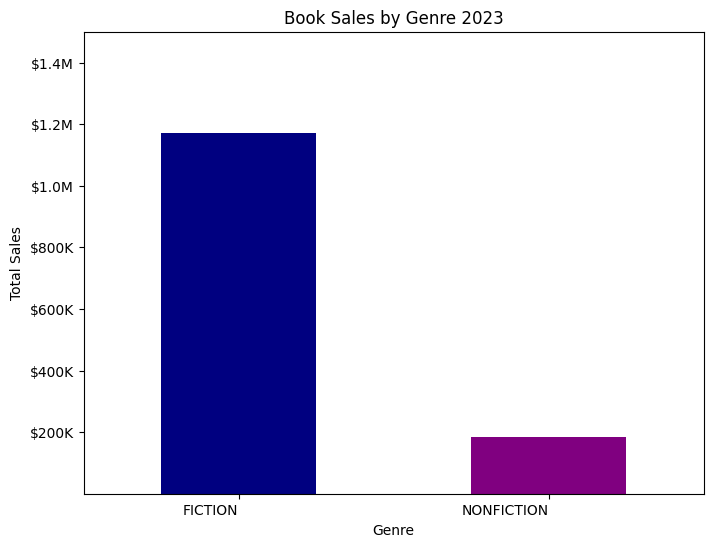

In [481]:
#grouped_data = df.groupby('Category')['Value'].sum()
sales_grouped_by = Full_Book_Details_mod2.groupby('Master_Genre')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# sales_grouped_by.plot(kind='bar', title='Book Sales by Genre')
# plt.xlabel('Master_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

#change orientation of graph and dollar ticks
def currency(x,pos):
    if x >=1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

fig, ax = plt.subplots(figsize=(8,6))
sales_grouped_by.plot(kind='bar', color=['navy','purple'])
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 0,
          horizontalalignment='right')
ax.set(ylim=[10,1500000],
       ylabel='Total Sales', xlabel='Genre',
       title='Book Sales by Genre 2023')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_Maser_Genre_Booksales.png')
plt.show()

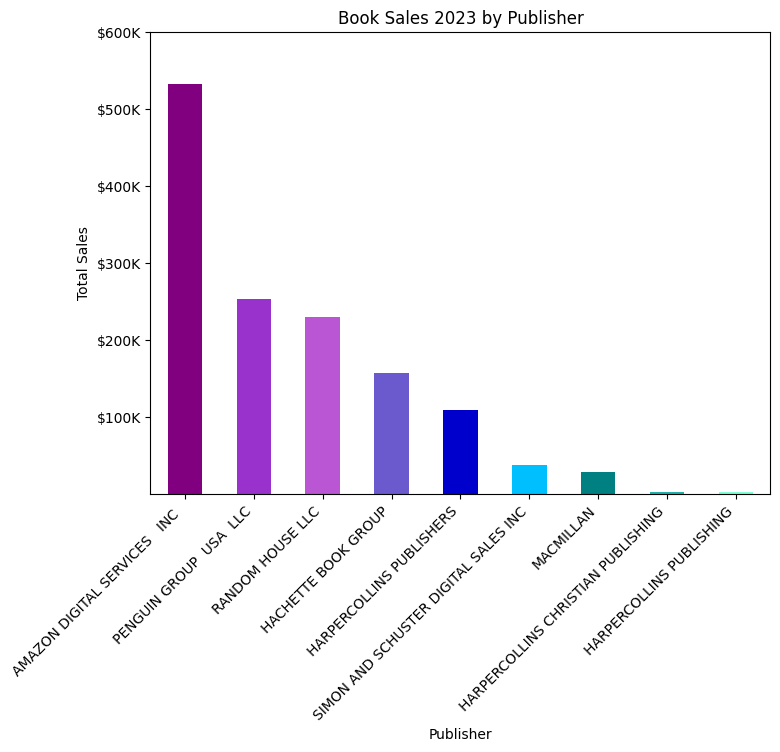

In [482]:
#sales by publisher
# #grouped_data = df.groupby('Category')['Value'].sum()
sales_by_publisher_grouped_by = Full_Book_Details_mod2.groupby('Publisher_')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# sales_by_publisher_grouped_by.plot(kind='bar', title='Book Sales by Publisher')
# plt.xlabel('Publisher')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
sales_by_publisher_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,600000],
       ylabel='Total Sales', xlabel='Publisher',
       title='Book Sales 2023 by Publisher')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Booksales_by_Publisher.png')
plt.show()

In [483]:
fiction = Full_Book_Details_mod2.loc[Full_Book_Details_modified['Master_Genre']== 'FICTION']
fiction 

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
0,THE LITTLE HOUSE COLLECTION,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNGADULT,CLASSICS,HISTORICALFICTION,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS
1,THE VELVETEEN RABBIT,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS,FANTASY,CLASSICS,PICTUREBOOKS,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE
2,LOVE YOU FOREVER,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS,CLASSICS,PICTUREBOOKS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE
3,JONATHAN LIVINGSTON SEAGULL,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,AMAZON DIGITAL SERVICES INC,1353,FICTION,SELFHELP,FANTASY,CLASSICS,PHILOSOPHY,SPIRITUALITY,INSPIRATIONAL,LITERATURE,NOVELS,ANIMALS
4,THE COMPLETE SHERLOCK HOLMES,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,PENGUIN GROUP USA LLC,398,FICTION,MYSTERY,CLASSICS,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,MYSTERYTHRILLER,HISTORICALFICTION,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,1977.0,JAY ANSON,1191.26,714.756,HACHETTE BOOK GROUP,52056,FICTION,MYSTERY,CLASSICS,HORROR,PARANORMAL,THRILLER,SUPERNATURAL,TRUECRIME,GHOSTS,None
691,THE BONE CLOCKS,2014.0,DAVID MITCHELL,781.96,469.176,RANDOM HOUSE LLC,2862,FICTION,MYSTERY,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,DYSTOPIA,ADULT,None
692,RULES OF CIVILITY,2011.0,AMOR TOWLES,712.81,427.686,PENGUIN GROUP USA LLC,40824,FICTION,LITERARYFICTION,ADULT,HISTORICALFICTION,HISTORICAL,NEWYORK,BOOKCLUB,ADULTFICTION,NOVELS,None
693,THE BLACK DAHLIA,1987.0,JAMES ELLROY,1088.91,653.346,RANDOM HOUSE LLC,4280,FICTION,MYSTERY,THRILLER,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,MYSTERYTHRILLER,DETECTIVE,HISTORICAL


In [484]:
nonfiction = Full_Book_Details_mod2.loc[Full_Book_Details_modified['Master_Genre']=='NONFICTION']
nonfiction

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
12,THE COMPLETE MAUS,1986.0,ART SPIEGELMAN,111.87,67.122,AMAZON DIGITAL SERVICES INC,2862,NONFICTION,BIOGRAPHY,CLASSICS,GRAPHICNOVELS,COMICS,HISTORY,MEMOIR,HISTORICAL,WAR,HOLOCAUST
14,THE AUTOBIOGRAPHY OF MALCOLM X,1965.0,MALCOLM X ALEX HALEY,2025.94,1215.564,RANDOM HOUSE LLC,406,NONFICTION,BIOGRAPHY,CLASSICS,HISTORY,MEMOIR,AUTOBIOGRAPHY,RACE,POLITICS,BIOGRAPHYMEMOIR,AFRICANAMERICAN
17,THE STORY OF MY LIFE,1902.0,HELEN KELLER,347.49,208.494,AMAZON DIGITAL SERVICES INC,351,NONFICTION,BIOGRAPHY,CLASSICS,MEMOIR,HISTORY,AUTOBIOGRAPHY,BIOGRAPHYMEMOIR,HISTORICAL,DISABILITY,None
22,THE TAO OF POOH,1982.0,BENJAMIN HOFF ERNEST H SHEPARD,1198.75,719.250,HARPERCOLLINS PUBLISHERS,46008,NONFICTION,SELFHELP,CLASSICS,PHILOSOPHY,SPIRITUALITY,RELIGION,TAOISM,HUMOR,PSYCHOLOGY,None
46,COSMOS,1980.0,CARL SAGAN,1131.62,678.972,PENGUIN GROUP USA LLC,35640,NONFICTION,SCIENCE,CLASSICS,ASTRONOMY,PHYSICS,HISTORY,SPACE,PHILOSOPHY,POPULARSCIENCE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,WHEN BREATH BECOMES AIR,2016.0,PAUL KALANITHI ABRAHAM VERGHESE,1041.39,0.000,AMAZON DIGITAL SERVICES INC,261,NONFICTION,BIOGRAPHY,MEMOIR,MEDICINE,MEDICAL,AUTOBIOGRAPHY,BIOGRAPHYMEMOIR,PHILOSOPHY,SCIENCE,None
663,BETWEEN THE WORLD AND ME,2015.0,TA NEHISI COATES,523.25,0.000,AMAZON DIGITAL SERVICES INC,4725,NONFICTION,BIOGRAPHY,MEMOIR,RACE,HISTORY,SOCIALJUSTICE,POLITICS,ESSAYS,AFRICANAMERICAN,None
664,THE FOREVER WAR,1974.0,JOE HALDEMAN,214.83,128.898,AMAZON DIGITAL SERVICES INC,5859,NONFICTION,HISTORY,HISTORY,WAR,POLITICS,MILITARYFICTION,JOURNALISM,MILITARYHISTORY,AMERICANHISTORY,TERRORISM
673,CHELSEA CHELSEA BANG BANG,2010.0,CHELSEA HANDLER,477.00,286.200,AMAZON DIGITAL SERVICES INC,106,NONFICTION,BIOGRAPHY,HUMOR,MEMOIR,COMEDY,AUTOBIOGRAPHY,ESSAYS,CHICKLIT,BIOGRAPHYMEMOIR,None


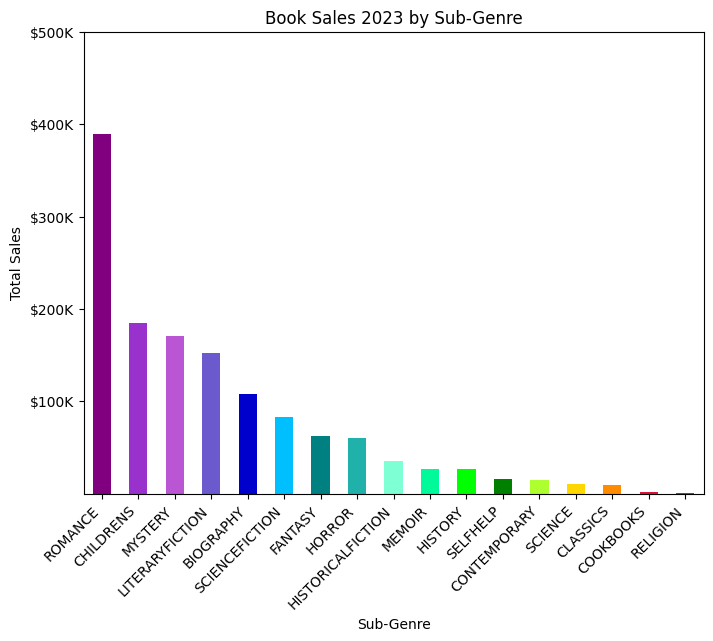

In [485]:
# chart book sales by sub-genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = Full_Book_Details_mod2.groupby('Master_Sub_Genre')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
# plt.xlabel('Master_Sub_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,500000],
       ylabel='Total Sales', xlabel='Sub-Genre',
       title='Book Sales 2023 by Sub-Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Sub_Genre_Booksales.png')
plt.show()

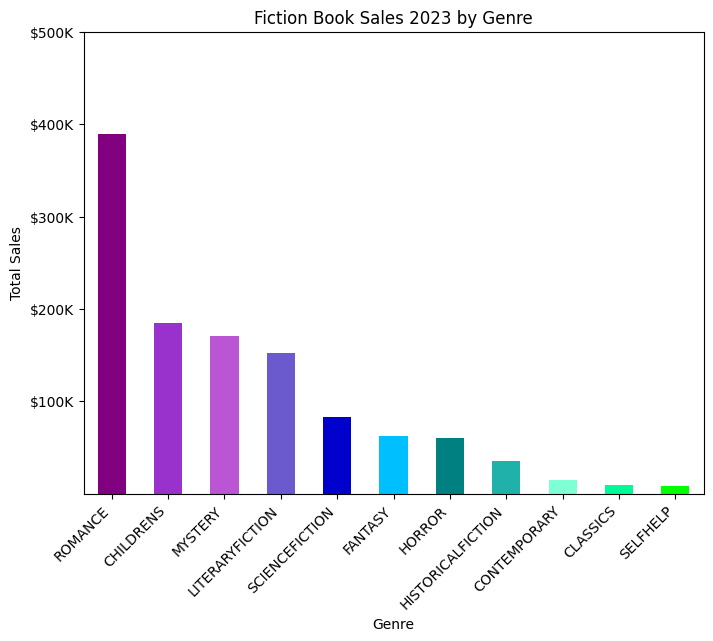

In [487]:
# chart book sales by master genre and sub genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = fiction.groupby('Master_Sub_Genre')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
# plt.xlabel('Master_Sub_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,500000],
       ylabel='Total Sales', xlabel='Genre',
       title='Fiction Book Sales 2023 by Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Fiction_Genre_Booksales.png')
plt.show()

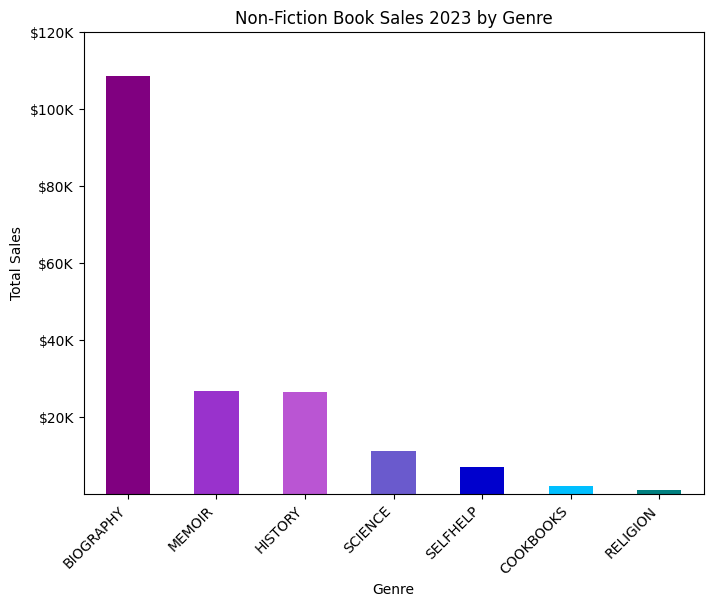

In [488]:
# chart book sales by sub-genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = nonfiction.groupby('Master_Sub_Genre')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
# plt.xlabel('Master_Sub_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,120000],
       ylabel='Total Sales', xlabel='Genre',
       title='Non-Fiction Book Sales 2023 by Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_NonFiction_Genre_Booksales.png')
plt.show()

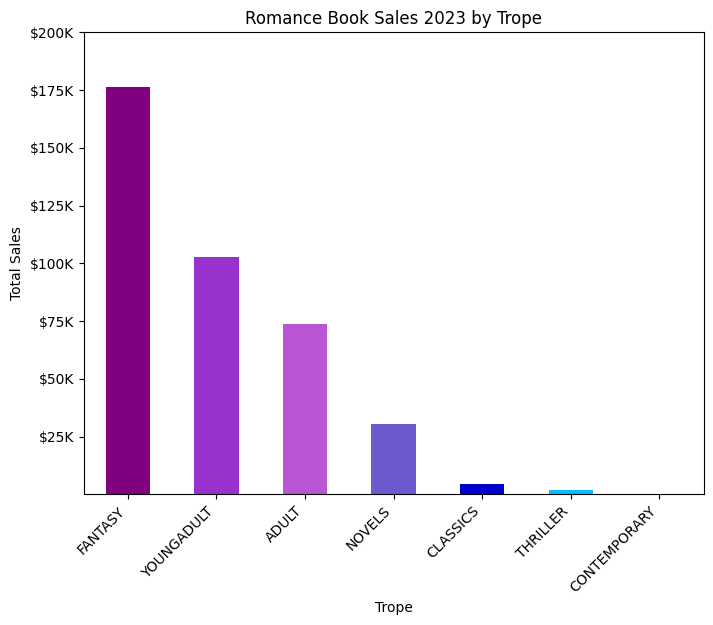

In [495]:
# chart book sales by master genre and sub genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = Fiction_Romance.groupby('Trope_1')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
# plt.xlabel('Master_Sub_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,200000],
       ylabel='Total Sales', xlabel='Trope',
       title='Romance Book Sales 2023 by Trope')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Romance_Genre_Booksales_by_Trope.png')
plt.show()

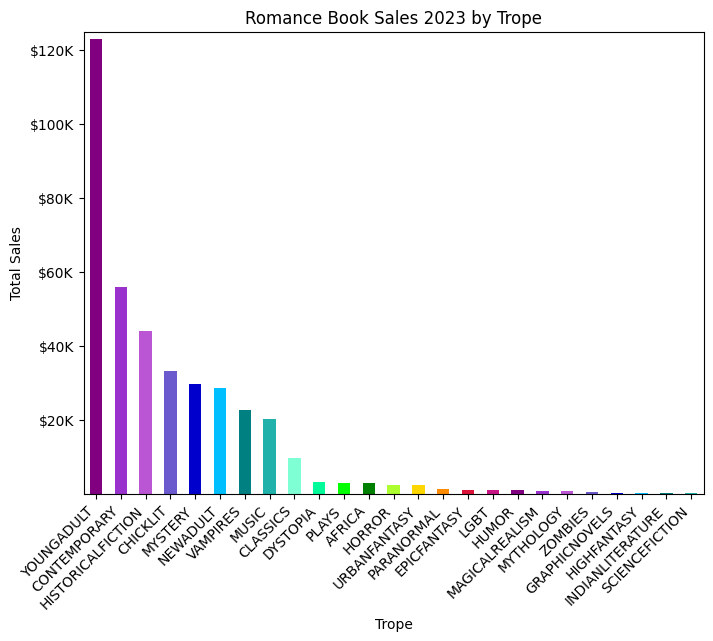

In [496]:
# chart book sales by master genre and sub genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = Fiction_Romance.groupby('Trope_2')['gross_sales'].sum()

# # Plot the grouped data as a bar chart
# Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
# plt.xlabel('Master_Sub_Genre')
# plt.ylabel('Sales Totals')
# plt.show()

colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,125000],
       ylabel='Total Sales', xlabel='Trope',
       title='Romance Book Sales 2023 by Trope')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Romance_Genre_Booksales_by_Trope2.png')
plt.show()